<a href="https://colab.research.google.com/github/ailinchau/AER850_Project2/blob/main/aer850_project2_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


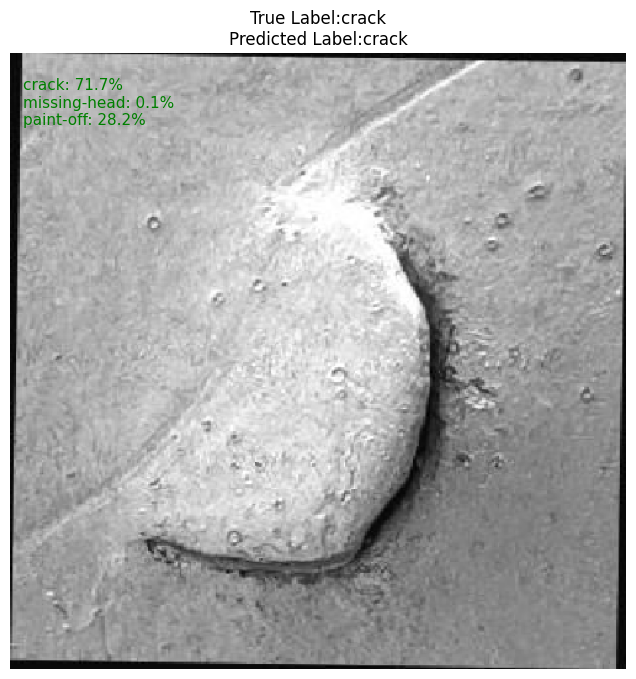

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step


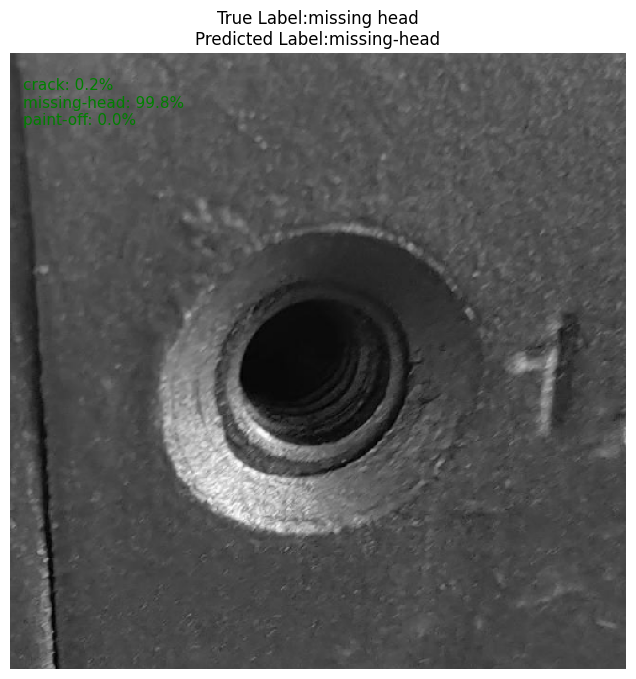

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step


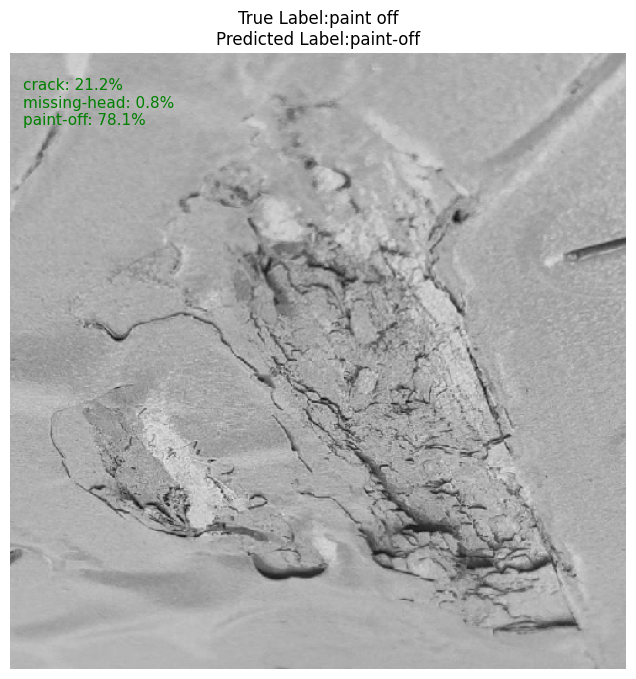

In [ ]:
from tensorflow.keras.preprocessing import image
import tensorflow as tf
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import os
import numpy as np


test_image_path={"crack":'/content/drive/MyDrive/Colab Notebooks/850 project 2 data/Project 2 Data/Data/test/crack/test_crack.jpg',
                 "missing head":'/content/drive/MyDrive/Colab Notebooks/850 project 2 data/Project 2 Data/Data/test/missing-head/test_missinghead.jpg',
                 "paint off":'/content/drive/MyDrive/Colab Notebooks/850 project 2 data/Project 2 Data/Data/test/paint-off/test_paintoff.jpg'}

class_labels = {0: "crack", 1: "missing-head", 2: "paint-off"}

img_size=(500,500)

def process_and_predict(img_path, model):

  img = image.load_img(img_path, target_size=img_size)
  img_array = image.img_to_array(img)/255.0
  img_array = np.expand_dims(img_array, axis=0)

  predictions = model.predict(img_array)
  class_prob=predictions[0]
  predicted_class_index = np.argmax(class_prob)
  predicted_probability = class_prob[predicted_class_index]
  predicted_label=class_labels[predicted_class_index]

  return predicted_class_index, predicted_probability,class_prob

def display_prediction(img_path, actual_label, predicted_label, class_prob, class_labels):
  img = image.load_img(img_path, target_size=img_size)
  plt.figure(figsize=(8,8))
  plt.imshow(img)
  plt.axis('off')
  plt.title(f"True Label:{actual_label}\nPredicted Label:{predicted_label}")
  text = "\n".join([f"{class_labels[i]}: {class_prob[i]*100:.1f}%" for i in range(len(class_prob))])
  plt.text(10,20,text,color='green', va='top', ha='left', fontsize=11)
  plt.show()


for label, img_path in test_image_path.items():
            predicted_class_index, predicted_probability, class_prob = process_and_predict(img_path, model)
            predicted_label = class_labels[predicted_class_index]
            display_prediction(img_path, label, predicted_label, class_prob, class_labels)